In [4]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline
from datetime import *

In [5]:
grabdata = r'C:\Users\vergarad\Documents\personal\grab\DataSeerGrabPrizeData-1.csv'

In [6]:
df = pd.read_csv(grabdata)

In [7]:
df.loc[:,('datetime')] = pd.to_datetime(df['created_at_local'])
df.set_index(df["datetime"],inplace=True)
df.loc[:,('month')] = df.index.month
df.loc[:,('day')] = df.index.day
df.loc[:,('weekday')] = df.index.weekday
df.loc[:,('hour')] = df.index.hour

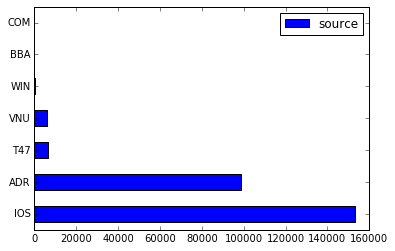

In [8]:
df['source'].value_counts().plot(kind='barh', legend=True)

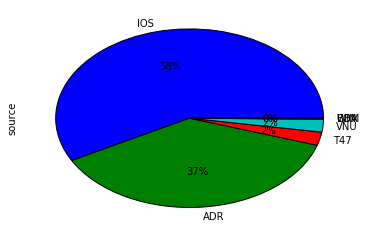

In [9]:
df['source'].value_counts().plot(kind='pie',autopct='%1.f%%')

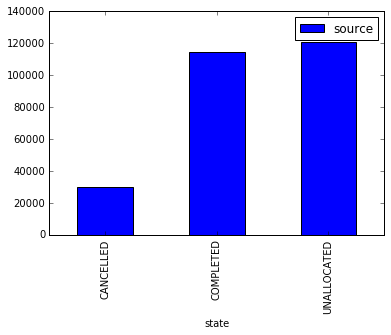

In [18]:
df[['state','source']].groupby('state').count().plot(kind='bar')
#.value_counts() #.plot(kind='bar')
#df.head()

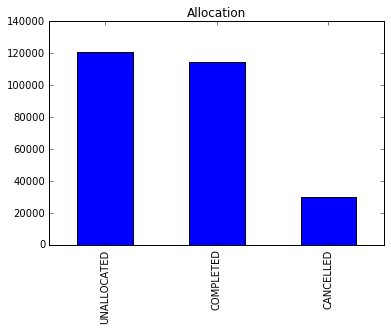

In [139]:
#ind = np.arange(2)
#p1 = plot.bar(ind,,0.50)
df['state'].value_counts().plot(kind='bar',title='Allocation',label='bookings')

In [72]:
source = df.groupby('source')

In [73]:
source.count()

,created_at_local,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,city,fare,pick_up_distance,state
source,,,,,,,,,
ADR,98675,98675,98675,98675,98675,98675,98675,53720,98675
BBA,15,15,15,15,15,15,15,0,15
COM,1,1,1,1,1,1,1,0,1
IOS,153398,153398,153398,153398,153398,153398,153398,85175,153398
T47,6374,6374,6374,6374,6374,6374,6374,1840,6374
VNU,6131,6131,6131,6131,6131,6131,6131,3594,6131
WIN,479,479,479,479,479,479,479,212,479


In [74]:
state = df.groupby('state')
state.count()

,source,created_at_local,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,city,fare,pick_up_distance
state,,,,,,,,,
CANCELLED,29954,29954,29954,29954,29954,29954,29954,29954,29954
COMPLETED,114586,114586,114586,114586,114586,114586,114586,114586,114586
UNALLOCATED,120533,120533,120533,120533,120533,120533,120533,120533,1


In [75]:
city = df.groupby('city')
city.count()

,source,created_at_local,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,fare,pick_up_distance,state
city,,,,,,,,,
Cebu,583,583,583,583,583,583,583,72,583
Davao,112,112,112,112,112,112,112,20,112
Metro Manila,264378,264378,264378,264378,264378,264378,264378,144449,264378


In [76]:
metro_manila = df['city'] == "Metro Manila"
android = df['source'] == "ADR"
ios = df['source'] == "IOS"
and_ios = df[android | ios]
filtered = and_ios[metro_manila]

C:\Users\vergarad\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [77]:
filtered.groupby('city').count()

,source,created_at_local,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,fare,pick_up_distance,state
city,,,,,,,,,
Metro Manila,251380,251380,251380,251380,251380,251380,251380,138803,251380


In [27]:
#filtered.groupby('state').count()
#filtered[['state','fare']].groupby('state').sum()
#filtered[['state','fare']].groupby('state')

In [80]:
filtered.loc[:,('revenue')] = 40

C:\Users\vergarad\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [81]:
filtered.head()

,source,created_at_local,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,city,fare,pick_up_distance,state,revenue
0,ADR,2013-09-22 23:46:18.000000,14.604348,120.998654,14.537370,120.994423,Metro Manila,281.875,0.389894,CANCELLED,40
3,ADR,2013-09-16 20:53:34.000000,14.585812,121.060171,14.575915,121.085487,Metro Manila,220.625,0.321403,CANCELLED,40
4,IOS,2013-09-10 23:49:16.000000,14.552010,121.051260,14.630210,120.995920,Metro Manila,378.125,0.667067,COMPLETED,40
6,IOS,2013-11-16 18:27:06.000000,14.586450,121.048870,14.639250,121.036810,Metro Manila,229.375,1.547550,COMPLETED,40
8,IOS,2013-08-28 18:37:49.000000,14.606880,121.080630,14.619470,121.086180,Metro Manila,163.750,0.854165,COMPLETED,40


In [82]:
filtered[['state','revenue']].head()

,state,revenue
0,CANCELLED,40
3,CANCELLED,40
4,COMPLETED,40
6,COMPLETED,40
8,COMPLETED,40


In [83]:
filtered.groupby('state').sum()

,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,fare,pick_up_distance,revenue
state,,,,,,,
CANCELLED,4.255747e+05,3.533127e+06,4.254615e+05,3.533053e+06,7.944442e+06,54588.370695,1167640
COMPLETED,1.598065e+06,1.326693e+07,1.597595e+06,1.326659e+07,2.892344e+07,121941.508990,4384440
UNALLOCATED,1.640276e+06,1.362652e+07,1.640251e+06,1.362601e+07,4.350000e+02,0.040148,4503120


In [96]:
#df.info()
df.loc[:,('datetime')] = pd.to_datetime(df['created_at_local'])
df.set_index(df["datetime"],inplace=True)
df.loc[:,('month')] = df.index.month
df.loc[:,('day')] = df.index.day
df.loc[:,('weekday')] = df.index.weekday
df.loc[:,('hour')] = df.index.hour

#df['created_at_local']

In [97]:
df.head()

,source,created_at_local,pick_up_latitude,pick_up_longitude,drop_off_latitude,drop_off_longitude,city,fare,pick_up_distance,state,datetime,month,day,weekday,hour
datetime,,,,,,,,,,,,,,,
2013-09-22 23:46:18,ADR,2013-09-22 23:46:18.000000,14.604348,120.998654,14.537370,120.994423,Metro Manila,281.875,0.389894,CANCELLED,2013-09-22 23:46:18,9,22,6,23
2013-11-04 03:51:59,T47,2013-11-04 03:51:59.000000,14.590099,121.082645,14.508611,121.019444,Metro Manila,413.125,2.209770,COMPLETED,2013-11-04 03:51:59,11,4,0,3
2013-11-21 05:21:24,T47,2013-11-21 05:21:24.000000,14.582707,121.061458,14.537752,121.001379,Metro Manila,277.500,2.702910,COMPLETED,2013-11-21 05:21:24,11,21,3,5
2013-09-16 20:53:34,ADR,2013-09-16 20:53:34.000000,14.585812,121.060171,14.575915,121.085487,Metro Manila,220.625,0.321403,CANCELLED,2013-09-16 20:53:34,9,16,0,20
2013-09-10 23:49:16,IOS,2013-09-10 23:49:16.000000,14.552010,121.051260,14.630210,120.995920,Metro Manila,378.125,0.667067,COMPLETED,2013-09-10 23:49:16,9,10,1,23
